In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 
from copy import deepcopy
from logger import Trace
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

def process_df(map_name, cols, map_col, data_cols, extra, df, window=10, save=False):
    
    col_index = 0
    
    num_iterations = df[cols[col_index]].nunique()
    num_episodes = df[cols[col_index+1]].nunique()
    iterations = df[cols[col_index]].unique()
    episodes = df[cols[col_index+1]].unique()
    
    print(f'episodes :{num_episodes} {episodes}, iterations:{num_iterations}')
    
    sum_df = pd.DataFrame(columns= extra)
    
    row = {}
    
    for i in iterations:
        row[cols[col_index]] = i 
        for e in episodes:
            row[cols[col_index+1]] = e
            for col in data_cols:
                row[col] = df.loc[(df[cols[col_index]] == i) & (df[cols[col_index+1]] == e), col].sum()
                
            sum_df = sum_df.append(row, ignore_index=True)
                                                                 
                                                                 
    print(sum_df)
    
    sum_df['mean_rew'] = sum_df[data_cols].mean(axis=1)
    sum_df['mean_std'] = sum_df[data_cols].std(axis=1)
    # .rolling(window=window).mean()
    
    print(sum_df)
    print(sum_df.describe())
    
    print('--- Smoothing...')
    
    smooth_df =sum_df.rolling(window=window).mean()
    print(smooth_df)
    print(smooth_df.describe())
    
    new_file = 'graph_data/'
    # sum_df.to_csv(new_file, encoding='utf-8')
    if save:
        print('---- Saving :' + map_name)
        smooth_df.to_csv(new_file+map_name+'.csv', encoding='utf-8')
    else:
        return sum_df

In [2]:
def smoothing(map_name, map_col, data_cols, extra, df, window=10, save=False):
    
    col_index = 0
    
    
    num_iterations = 1
    num_episodes = df.shape[0]
    
    print(f'episodes :{num_episodes}, iterations:{num_iterations}')                                                             
                                                                 
    
    df['mean_rew'] = df[data_cols].mean(axis=1)
    df['std'] = df[data_cols].std(axis=1)
    max_val = np.max(df[data_cols].max())
    min_val = np.min(df[data_cols].min())
    df['norm_mean'] = (df['mean_rew'] - min_val)/ (max_val - min_val)
    # .rolling(window=window).mean()
    
    print(df)
    print(df.describe())
    
    print('--- Smoothing...')
    
    smooth_df = df.copy()
    smooth_df['mean_smooth_rew'] =df['norm_mean'].rolling(window=window).mean()
    smooth_df['std_smooth_rew'] =df['norm_mean'].rolling(window=window).std()
    
    print(smooth_df)
    print(smooth_df.describe())
    
    new_file = 'graph_data/'
    # sum_df.to_csv(new_file, encoding='utf-8')
    if save:
        print('---- Saving :' + map_name)
        smooth_df.to_csv(new_file+map_name+'.csv', encoding='utf-8')
    else:
        return smooth_df

In [3]:
n_agents = 2
window=1000

### Load trace from file

In [4]:
file= 'shared_oa_ex3_returns_df.csv'
array_file = 'shared_oa_ex3_returns.csv'

In [5]:
trace = Trace(n_agents, file)

FileNotFoundError: [Errno 2] No such file or directory: 'shared_oa_ex3_returns_df.csv'

In [6]:
# cols =  trace.columns
data_cols = [f'reward_{i}' for i in range(n_agents)]
map_col = 'map'
extra =[]# [f'std_dev_{i}' for i in range(n_agents)]
extra.append('mean_rew' )
extra.append('mean_std')
map_name= 'benchmark1'

In [7]:
arr = np.loadtxt(array_file, delimiter=",")

In [8]:
df = pd.DataFrame(data = arr,
                  columns = data_cols)
df.head()

ValueError: Shape of passed values is (70000, 1), indices imply (70000, 2)

In [70]:
sum_df=smoothing(map_name, map_col, data_cols, extra, df, window=window)

episodes :75000, iterations:1
       reward_0  reward_1  mean_rew  std  norm_mean
0          0.00      0.00      0.00  0.0        0.0
1          0.00      0.00      0.00  0.0        0.0
2          0.00      0.00      0.00  0.0        0.0
3          0.00      0.00      0.00  0.0        0.0
4          0.00      0.00      0.00  0.0        0.0
...         ...       ...       ...  ...        ...
74995      0.01      0.01      0.01  0.0        1.0
74996      0.00      0.00      0.00  0.0        0.0
74997      0.01      0.01      0.01  0.0        1.0
74998      0.01      0.01      0.01  0.0        1.0
74999      0.01      0.01      0.01  0.0        1.0

[75000 rows x 5 columns]
           reward_0      reward_1      mean_rew      std     norm_mean
count  75000.000000  75000.000000  75000.000000  75000.0  75000.000000
mean       0.003760      0.003760      0.003760      0.0      0.375973
std        0.004844      0.004844      0.004844      0.0      0.484376
min        0.000000      0.000000   

In [51]:
sum_df.shape


(75000, 7)

## Load baseline

In [45]:
array_file_base = 'shared_oa_ex3_returns_base.csv'
arrb = np.loadtxt(array_file_base, delimiter=",")

In [46]:
df_b = pd.DataFrame(data = arrb,
                  columns = data_cols)
df_b.head()

,reward_0,reward_1
0,12.0,14.0
1,10.0,12.0
2,12.0,14.0
3,10.0,10.0
4,12.0,12.0


In [47]:
np.max(df_b[data_cols].max())

14.0

In [71]:
sum_df_b=smoothing(map_name, map_col, data_cols, extra, df_b, window=1000)

episodes :75000, iterations:1
       reward_0  reward_1  mean_rew       std  norm_mean
0          12.0      14.0      13.0  1.414214   0.928571
1          10.0      12.0      11.0  1.414214   0.785714
2          12.0      14.0      13.0  1.414214   0.928571
3          10.0      10.0      10.0  0.000000   0.714286
4          12.0      12.0      12.0  0.000000   0.857143
...         ...       ...       ...       ...        ...
74995      12.0      14.0      13.0  1.414214   0.928571
74996      10.0      12.0      11.0  1.414214   0.785714
74997      12.0       2.0       7.0  7.071068   0.500000
74998      12.0      14.0      13.0  1.414214   0.928571
74999      12.0       4.0       8.0  5.656854   0.571429

[75000 rows x 5 columns]
           reward_0      reward_1      mean_rew           std     norm_mean
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000
mean      10.334107     10.236507     10.285307      2.106537      0.734665
std        2.326512      3.92220

## Plotting

In [104]:
import tikzplotlib
import matplotlib
plt.style.use("seaborn-talk")
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True
})


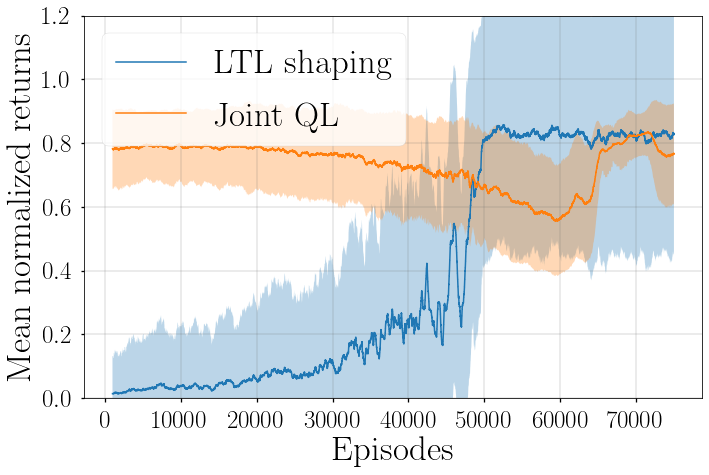

In [123]:
graphsize = 35
fig, axs = plt.subplots(1, 1)

sum_df.plot(kind='line', y='mean_smooth_rew', ax=axs, label='LTL shaping', linewidth=1.5, fontsize=graphsize-10)
axs.fill_between(np.arange(0,sum_df.shape[0]), sum_df['mean_smooth_rew']-sum_df['std_smooth_rew'], sum_df['mean_smooth_rew']+sum_df['std_smooth_rew'],
                       alpha= 0.3, linewidth=0)
sum_df_b.plot(kind='line', y='mean_smooth_rew', ax=axs, label='Joint QL', linewidth=1.5, fontsize=graphsize-10)
axs.fill_between(np.arange(0,sum_df_b.shape[0]), sum_df_b['mean_smooth_rew']-sum_df_b['std_smooth_rew'], sum_df_b['mean_smooth_rew']+sum_df_b['std_smooth_rew'],
                       alpha= 0.3, linewidth=0)

# axs[1, 1].plot(x, -y, 'tab:red')
# axs.set_title('Benchmark 1', fontsize=25)
axs.legend(loc='upper left', fontsize=graphsize)
axs.ticklabel_format(axis='both')

# axs.set(xlabel='Episodes', ylabel='')
axs.set_xlabel('Episodes', fontsize=graphsize)
axs.set_ylabel('Mean normalized returns', fontsize=graphsize)
axs.set_ylim([0, 1.2])
axs.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=0.25)

plt.tight_layout()
plt.show()

In [73]:
tikzplotlib.clean_figure(fig=fig, target_resolution=300)


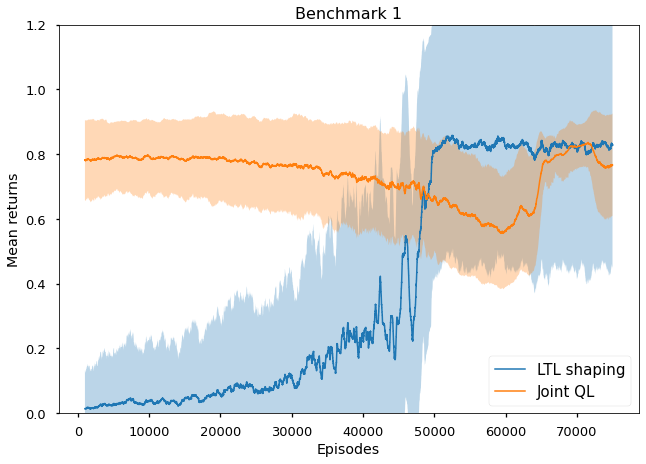

In [74]:
fig

In [75]:
tikzplotlib.save("graph_data/learning_curve_"+map_name+".tex", figure=fig)

In [124]:
fig.savefig("graph_data/"+map_name+".png", transparent=True, dpi=600)